In [ ]:
!pip install pmdarima
!pip install pandas==0.23.4

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
import numpy as np
import pandas as pd
import os, datetime
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
import math

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
%matplotlib inline
from google.colab import drive

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir task_usage

In [ ]:
#Mount the drive and upload data to drive
df_master=pd.read_csv('/content/task_usage/load.csv')

In [ ]:
cpu_df = df_master.copy()

In [ ]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 2 columns):
CPU load               990 non-null float64
CPU_load_normalized    990 non-null float64
dtypes: float64(2)
memory usage: 15.5 KB


In [ ]:
cpu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 2 columns):
CPU load               990 non-null float64
CPU_load_normalized    990 non-null float64
dtypes: float64(2)
memory usage: 15.5 KB


In [ ]:
cpu_df.head(5)

,CPU load,CPU_load_normalized
0,49.98,0.4998
1,51.06,0.5106
2,56.01,0.5601
3,80.25,0.8025
4,75.81,0.7581


In [ ]:
cpu_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
cpu_df.dropna(how="any", inplace=True)
cpu_df.fillna("", inplace=True)
cpu_df.head(5)

,CPU load,CPU_load_normalized
0,49.98,0.4998
1,51.06,0.5106
2,56.01,0.5601
3,80.25,0.8025
4,75.81,0.7581


In [ ]:
cpu_df.isnull().sum()

CPU load               0
CPU_load_normalized    0
dtype: int64

In [ ]:
cpu_df.head(5)

,CPU load,CPU_load_normalized
0,49.98,0.4998
1,51.06,0.5106
2,56.01,0.5601
3,80.25,0.8025
4,75.81,0.7581


In [ ]:
dataset = df_close.copy()

In [ ]:
cpu_df.head()

,CPU load,CPU_load_normalized
0,49.98,0.4998
1,51.06,0.5106
2,56.01,0.5601
3,80.25,0.8025
4,75.81,0.7581


In [ ]:
cpu_df.describe()

,CPU load,CPU_load_normalized
count,990.000000,990.000000
mean,79.725899,0.797259
std,12.028060,0.120281
min,49.670000,0.496700
25%,72.055000,0.720550
50%,81.325000,0.813250
75%,89.447500,0.894475
max,99.950000,0.999500


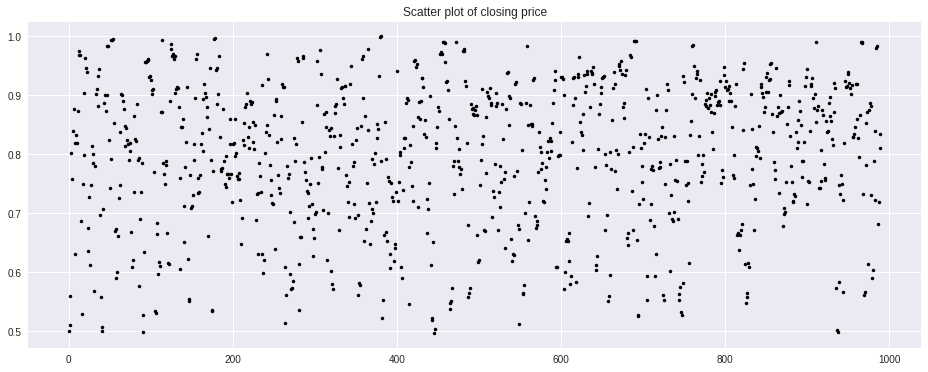

In [ ]:
plt.figure(figsize=(16,6))
df_close = cpu_df['CPU_load_normalized']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()


#Test for Stationarity

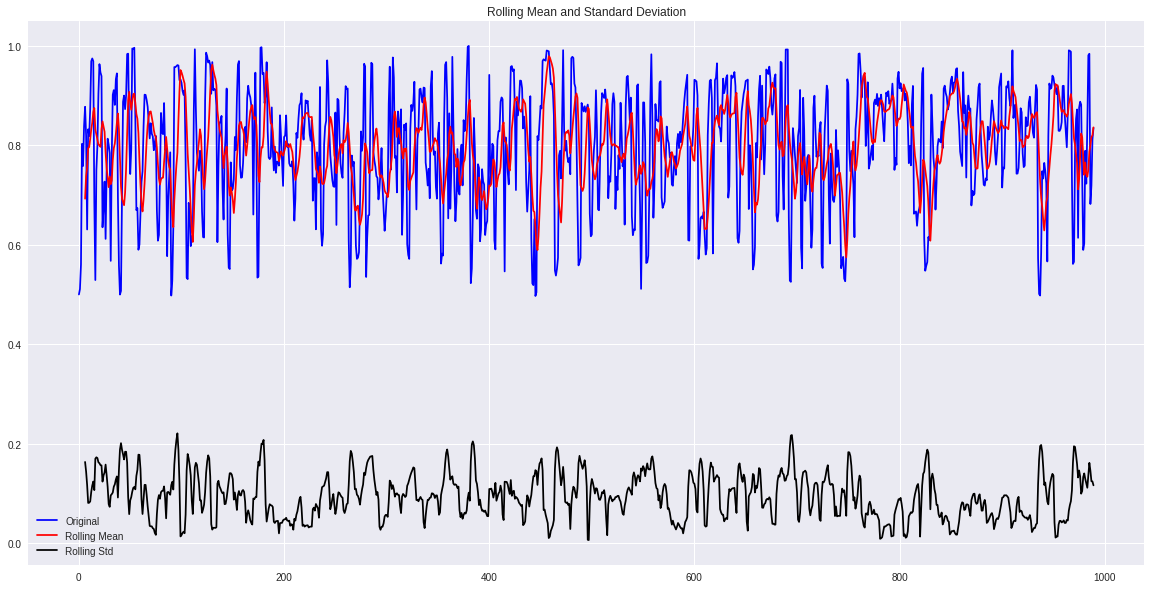

In [ ]:
#Determing rolling statistics
plt.figure(figsize=(20,10))
rolmean = df_close.rolling(window = 7).mean()
rolstd = df_close.rolling(window = 7).std()
#Plot rolling statistics:
plt.plot(df_close, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

#Augumented Dickey Fuller Test


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(dataset)
print(f"ADX Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print('Critical Values:')
for key, value in result[4].items():
  print('\t{}: {}'.format(key, value))

ADX Statistic: -17.69400903416842
p-value: 3.561572366584476e-30
Critical Values:
	1%: -3.4369860032923145
	5%: -2.8644697838498376
	10%: -2.5683299626694422


#Finding p,d and q values

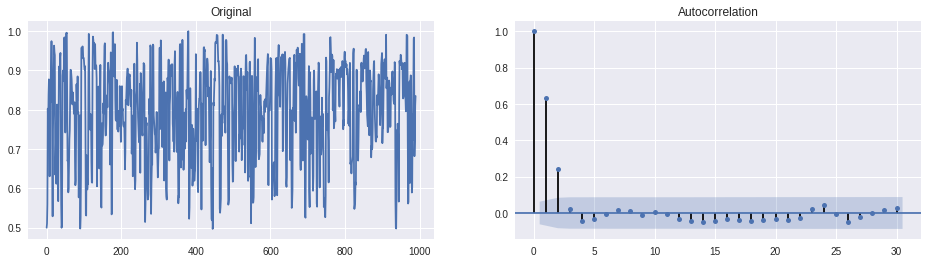

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
ax1.plot(dataset)
ax1.set_title("Original")
plot_acf(dataset,ax = ax2);

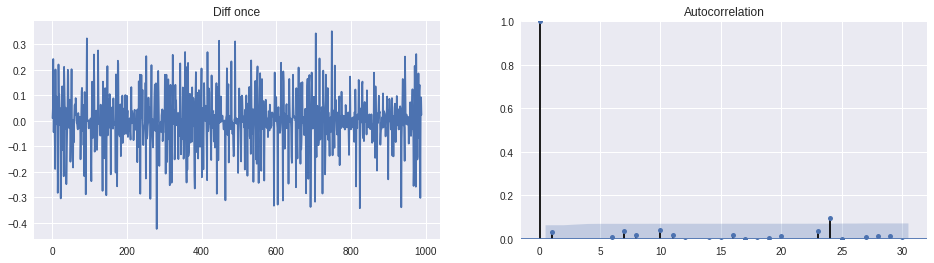

In [ ]:
diff = dataset.diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
ax1.plot(diff)
ax1.set_title("Diff once")
ax2.set_ylim(0, 1)
plot_acf(diff,ax = ax2);

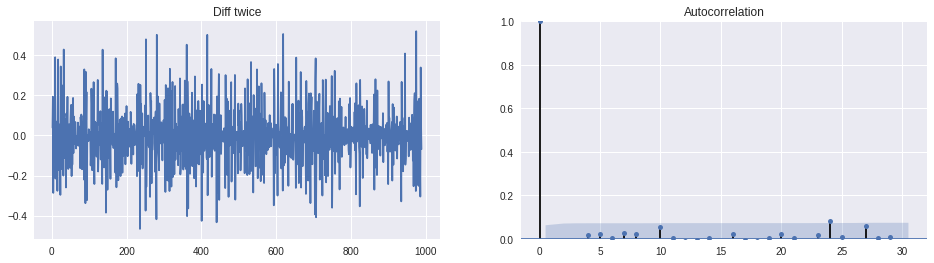

In [ ]:
diff = dataset.diff().diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
ax1.plot(diff)
ax1.set_title("Diff twice")
ax2.set_ylim(0, 1)
plot_acf(diff,ax = ax2);

#P-value from partial auto-correlation plot

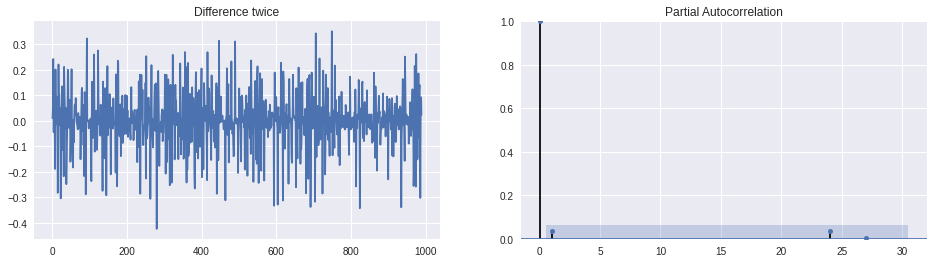

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
diff = dataset.diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))

ax1.plot(diff)
ax1.set_title("Difference twice")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax = ax2);

#Q-value from auto-correlation plot

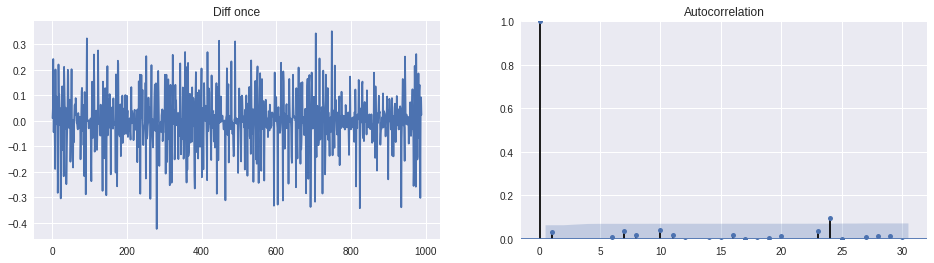

In [ ]:
diff = dataset.diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
ax1.plot(diff)
ax1.set_title("Diff once")
ax2.set_ylim(0, 1)
plot_acf(diff,ax = ax2);

#Auto Arima Model

In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(dataset, trace= True, suppress_warnings= True, seasonal=True,start_p=0,start_q=0, stepwise=False)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=-1381.000, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=-1847.929, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=-1951.366, Time=0.54 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=-1959.258, Time=0.81 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=-1957.283, Time=0.89 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=-1955.509, Time=1.53 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=-1892.295, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=-1949.702, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=-1957.903, Time=0.76 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=-1957.275, Time=2.10 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=-1955.598, Time=0.78 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=-1961.645, Time=0.34 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=-1959.843, Time=1.27 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=-1958.271, Time=1.09 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=-1956.185, Time=2.08

In [ ]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  990
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 984.823
Date:                Thu, 26 Aug 2021   AIC                          -1961.645
Time:                        00:22:14   BIC                          -1942.055
Sample:                             0   HQIC                         -1954.196
                                - 990                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3661      0.022     16.930      0.000       0.324       0.409
ar.L1          0.8051      0.033     24.388      0.000       0.740       0.870
ar.L2         -0.2644      0.030     -8.916      0.000      -0.322      -0.206
sigma2         0.0080      0.000     20.819      0.000       0.007       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                96.83
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.61
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#ADF

In [ ]:
from statsmodels.tools.data import _is_using_pandas
from pmdarima.arima.utils import ndiffs

In [ ]:
ndiffs(dataset, test="adf")

0

#Split data to train and test

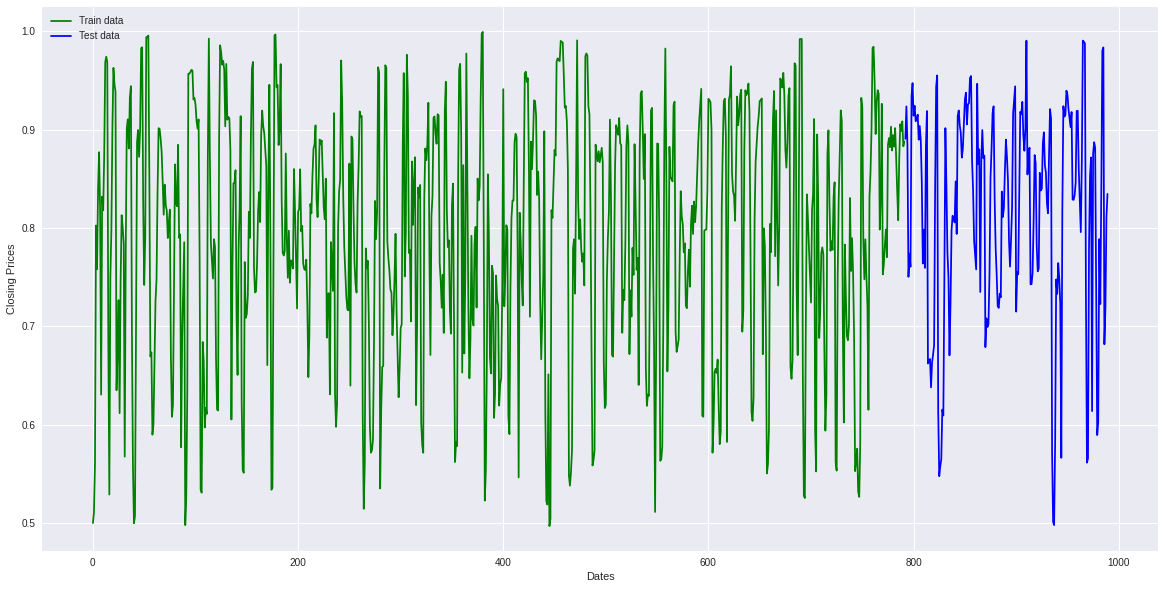

In [ ]:
n = int(len(dataset)*0.80)
train = dataset[:n]
test = dataset[n:]
plt.figure(figsize=(20,10))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train, 'green', label='Train data')
plt.plot(test, 'blue', label='Test data')
plt.legend()

#Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train,order = (2,0,0))
model = model.fit(disp = 0)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                              
===============================================================================
Dep. Variable:     CPU_load_normalized   No. Observations:                  792
Model:                      ARMA(2, 0)   Log Likelihood                 766.551
Method:                        css-mle   S.D. of innovations              0.092
Date:                 Thu, 26 Aug 2021   AIC                          -1525.102
Time:                         00:22:27   BIC                          -1506.404
Sample:                              0   HQIC                         -1517.916
                                                                               
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.7921      0.007    114.933      0.000       0.779       0.806
ar.L1.CPU_load_normalized     0.7986      0.034     23.345      0.000       0.732       0.866
ar.L2.CPU_load_normalized    -0.2720      0.034     -7.927      0.000      -0.339      -0.205
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4680           -1.2335j            1.9174           -0.1112
AR.2            1.4680           +1.2335j            1.9174            0.1112
-----------------------------------------------------------------------------
"""

<Figure size 1080x1440 with 0 Axes>

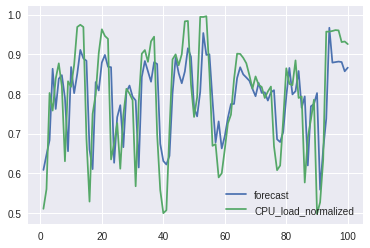

In [ ]:
fig = plt.figure(figsize=(15,20))
title = fig.suptitle("Arima Model", fontsize=22)
#plt.figure(figsize = (20,10))
model.plot_predict(start = 1, end = 100, dynamic=False)
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
X = dataset.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,0,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=0.843940, expected=0.890600
predicted=0.844786, expected=0.923700
predicted=0.870712, expected=0.883900
predicted=0.829949, expected=0.750300
predicted=0.733783, expected=0.773900
predicted=0.789047, expected=0.760600
predicted=0.771978, expected=0.934000
predicted=0.914222, expected=0.947400
predicted=0.877930, expected=0.914200
predicted=0.847879, expected=0.924400
predicted=0.865283, expected=0.908600
predicted=0.850009, expected=0.910200
predicted=0.855728, expected=0.915300
predicted=0.859535, expected=0.889800
predicted=0.837822, expected=0.903800
predicted=0.856064, expected=0.889700
predicted=0.841080, expected=0.846300
predicted=0.810113, expected=0.763900
predicted=0.755691, expected=0.798300
predicted=0.805488, expected=0.759400
predicted=0.765032, expected=0.882200
predicted=0.873890, expected=0.919000
predicted=0.870473, expected=0.662100
predicted=0.654828, expected=0.665100
predicted=0.726387, expected=0.666700
predicted=0.726682, expected=0.637900
predicted=0.

#Forecasting

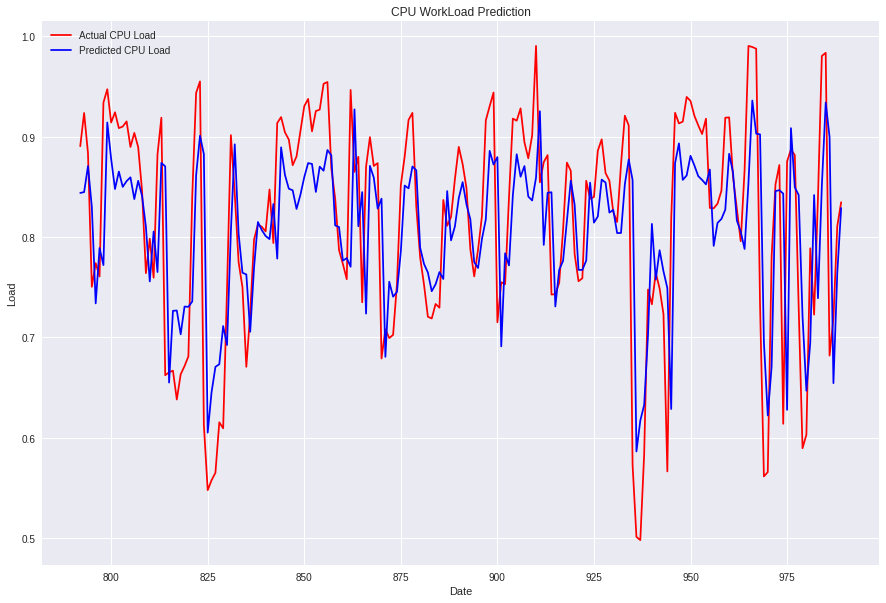

In [ ]:
fig = plt.figure(figsize=(15,10))
test_set_range = dataset[int(len(dataset)*0.8):].index
plt.plot(test_set_range, test[:198], color='red', label='Actual CPU Load')
plt.plot(test_set_range, predictions[:198], color='blue',label='Predicted CPU Load')

plt.title('CPU WorkLoad Prediction')
plt.xlabel('Date')
plt.ylabel('Load')
#plt.xticks(np.arange(881,1259,50), dataset.Date[881:1259:50])
plt.legend()
plt.show()

#Metrics 

In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

MSE_error = mean_squared_error(test, predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))
mae = mean_absolute_error(test, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test, predictions))
print('RMSE: '+str(rmse))

Testing Mean Squared Error is 0.006258973386054765
MAE: 0.06084761076292423
RMSE: 0.07911367382478686
